In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt

%matplotlib notebook

plt.style.use('default')
mpl.rcParams['figure.figsize'] = (10, 10)

In [31]:
#Open the csv files with the terrains data

terrains2001 = pd.read_csv('precio-de-terrenos-2001.csv', sep=';', thousands=',')
terrains2002 = pd.read_csv('precio-de-terrenos-2002.csv', sep=';', thousands=',')
terrains2003 = pd.read_csv('precio-de-terrenos-2003.csv', sep=';', thousands=',')
terrains2004 = pd.read_csv('precio-de-terrenos-2004.csv', sep=';', thousands=',')
terrains2005 = pd.read_csv('precio-de-terrenos-2005.csv', sep=';', thousands=',')
terrains2006 = pd.read_csv('precio-de-terrenos-2006.csv', sep=';', thousands=',')
terrains2007 = pd.read_csv('precio-de-terrenos-2007.csv', sep=';', thousands=',')
terrains2008 = pd.read_csv('precio-de-terrenos-2008.csv', sep=';', thousands=',')
terrains2009 = pd.read_csv('precio-de-terrenos-2009.csv', sep=';', thousands=',')
terrains2010 = pd.read_csv('precio-de-terrenos-2010.csv', sep=';', thousands=',')
terrains2011 = pd.read_csv('precio-de-terrenos-2011.csv', sep=';', thousands=',')
terrains2012 = pd.read_csv('precio-de-terrenos-2012.csv', sep=';', thousands=',')
terrains2013 = pd.read_csv('precio-de-terrenos-2013.csv', sep=';', thousands=',')
terrains2014 = pd.read_csv('precio-de-terrenos-2014.csv', sep=';')
terrains2015 = pd.read_csv('precio-de-terrenos-2015.csv', sep=';')

#2015 Does not have a date column
terrains2015['Date'] = pd.to_datetime('2015/06/01', format='%Y/%m/%d')
terrains2016 = pd.read_csv('precio-de-terrenos-2016.csv', decimal=',', sep=';')

#2016 has empty values with a single space for the Date column
terrains2016['FECHA'] = (terrains2016['FECHA'].apply(lambda x: str(x.replace(' ', '12/29/2016'))))
terrains2017 = pd.read_csv('precio-de-terrenos-2017.csv', decimal=',', sep=';')

In [32]:
#This function will clean the dataframes and return it with renamed columns. 

def cleanData(df):

        #First, we define the column names used in all dataframes and their corresponding unified name
        columnNames = {'barrio': 'Location', 'fecha': 'Date', 'dolares': 'Value in US Dollars', 
                      'u_s_m2': 'Value of m2 (US Dollars)', 'BARRIOS': 'Location', 'FECHA': 'Date', 
                       'DOLARES': 'Value in US Dollars', 'U_S_M2': 'Value of m2 (US Dollars)', 'M2': 'm2',
                       'BARRIO': 'Location'}
        
        #Then, delete empty rows, rename the columns and set the index for the Location (Name of the Barrio)
        df = (df.dropna()
            .rename(columns=columnNames)
            .set_index('Location'))
        
        #With the following line, we indicate that we only wish to keep the columns below, then the rest can be deleted
        df = df[['Date', 'Value in US Dollars', 'Value of m2 (US Dollars)', 'm2']]
        
        #Since some of the date columns are a String datatype, this sets them as datetime type.
        df['Date'] = pd.to_datetime(df['Date'])
        
        #This is to unify the format of the date column so that all dataframes are the same
        df['Date'] = df['Date'].dt.strftime('%Y/%m/%d')
        
        #Unify the Data type for the column 'Value of m2 (US Dollars)' to float. This will allow to perform operations later.
        df['Value of m2 (US Dollars)'] = df['Value of m2 (US Dollars)'].astype(float)
        df['Value in US Dollars'] = df['Value of m2 (US Dollars)'] * df['m2']
        return df

In [33]:
terrains2001 = cleanData(terrains2001)
terrains2002 = cleanData(terrains2002)
terrains2003 = cleanData(terrains2003)
terrains2004 = cleanData(terrains2004)
terrains2005 = cleanData(terrains2005)
terrains2006 = cleanData(terrains2006)
terrains2007 = cleanData(terrains2007)
terrains2008 = cleanData(terrains2008)
terrains2009 = cleanData(terrains2009)
terrains2010 = cleanData(terrains2010)
terrains2011 = cleanData(terrains2011)
terrains2012 = cleanData(terrains2012)
terrains2013 = cleanData(terrains2013)
terrains2014 = cleanData(terrains2014)
terrains2015 = cleanData(terrains2015)
terrains2016 = cleanData(terrains2016)
terrains2017 = cleanData(terrains2017)

In [15]:
terrains2017.head()

,Date,Value in US Dollars,Value of m2 (US Dollars),m2
Location,,,,
CONSTITUCION,2017/06/13,339999.0,1030.3,330
RETIRO,2017/08/06,34999897.5,5083.5,6885
MONSERRAT,2017/09/06,7500060.0,4360.5,1720
CONSTITUCION,2017/12/06,600000.0,750.0,800
SAN TELMO,2017/07/06,799998.4,3149.6,254


In [16]:
#Here we create a single Dataframe that contains all the data

frames = [terrains2001, terrains2002, terrains2003, terrains2004, terrains2005, terrains2006, terrains2007, terrains2008,
          terrains2009, terrains2010, terrains2011, terrains2012, terrains2013, terrains2015, terrains2016, terrains2017]

df = pd.concat(frames)

In [17]:
df.head()

,Date,Value in US Dollars,Value of m2 (US Dollars),m2
Location,,,,
PALERMO,2001/12/10,720000.0,2400.0,300.0
BELGRANO,2001/12/10,729975.0,973.3,750.0
BELGRANO,2001/12/10,650032.5,847.5,767.0
NUÑEZ,2001/12/10,369991.2,994.6,372.0
VILLA ORTUZAR,2001/12/10,94005.7,676.3,139.0


In [18]:
df.index.unique()

Index(['PALERMO', 'BELGRANO', 'NUÑEZ', 'VILLA ORTUZAR', 'BALVANERA',
       'SAN CRISTOBAL', 'VILLA CRESPO', 'VILLA GENERAL MITRE', 'FLORESTA',
       'PARQUE CHACABUCO', 'PARQUE AVELLANEDA', 'CABALLITO', 'ALMAGRO',
       'POMPEYA', 'VILLA URQUIZA', 'SAAVEDRA', 'VILLA PUYRREDON', 'VILLA LURO',
       'MATADEROS', 'FLORES', 'VERSAILLES', 'LINIERS', 'VELEZ SARFIELD',
       'VILLA DEVOTO', 'BOCA', 'AGRONOMIA', 'CHACARITA', 'PATERNAL',
       'COLEGIALES', 'VILLA DEL PARQUE', 'VILLA LUGANO', 'VILLA SANTA RITA',
       'BARRACAS', 'MONTE CASTRO', 'VILLA RIACHUELO', 'RETIRO', 'MONSERRAT',
       'VILLA SOLDATI', 'CONSTITUCION', 'BOEDO', 'PARQUE PATRICIOS',
       'SAN TELMO', 'GOGHLAND', 'SAN NICOLAS', 'RECOLETA', 'VILLA REAL',
       'VILLA PUEYRREDON', 'VILLA GRAL. MITRE', 'VELEZ SARSFIELD',
       'NUEVA POMPEYA', 'PARQUE CHAS', 'VERSALLES', 'COGHLAN', 'PUERTO MADERO',
       'MONTSERRAT', 'PARQUE AVELLANED', 'NUNEZ', 'VILLA GRAL. MITR',
       'VILLA GRAL MITRE', 'NU?ÆEZ'],
      dtype

In [19]:
#Since the names of the different barrios are not unified, here we correct them so that they all have the right names 

df.reset_index(inplace=True)
df['Location'] = (df['Location'].apply(lambda x: str(x.replace('NUNEZ', 'NUÑEZ'))))
df['Location'] = (df['Location'].apply(lambda x: str(x.replace('NU?ÆEZ', 'NUÑEZ'))))
df['Location'] = (df['Location'].apply(lambda x: str(x.replace('GOGHLAND', 'COGHLAN'))))
df['Location'] = (df['Location'].apply(lambda x: str(x.replace('PARQUE AVELLANED', 'PARQUE AVELLANEDA'))))
df['Location'] = (df['Location'].apply(lambda x: str(x.replace('SARSFIELD', 'SARFIELD'))))
df['Location'] = (df['Location'].apply(lambda x: str(x.replace('VILLA GRAL. MITRE', 'VILLA GENERAL MITRE'))))
df['Location'] = (df['Location'].apply(lambda x: str(x.replace('VILLA GRAL. MITR', 'VILLA GENERAL MITRE'))))
df['Location'] = (df['Location'].apply(lambda x: str(x.replace('VILLA GRAL MITRE', 'VILLA GENERAL MITRE'))))
df['Location'] = (df['Location'].apply(lambda x: str(x.replace('VILLA PUYRREDON', 'VILLA PUEYRREDON'))))
df['Location'] = (df['Location'].apply(lambda x: str(x.replace('PARQUE AVELLANEDAA', 'PARQUE AVELLANEDA'))))
df['Location'] = (df['Location'].apply(lambda x: str(x.replace('VERSALLES', 'VERSAILLES'))))
df['Location'] = (df['Location'].apply(lambda x: str(x.replace('MONSERRAT', 'MONTSERRAT'))))

In [20]:
#Here are the corrected names for each Barrio in Buenos Aires
df['Location'].unique()

array(['PALERMO', 'BELGRANO', 'NUÑEZ', 'VILLA ORTUZAR', 'BALVANERA',
       'SAN CRISTOBAL', 'VILLA CRESPO', 'VILLA GENERAL MITRE', 'FLORESTA',
       'PARQUE CHACABUCO', 'PARQUE AVELLANEDA', 'CABALLITO', 'ALMAGRO',
       'POMPEYA', 'VILLA URQUIZA', 'SAAVEDRA', 'VILLA PUEYRREDON',
       'VILLA LURO', 'MATADEROS', 'FLORES', 'VERSAILLES', 'LINIERS',
       'VELEZ SARFIELD', 'VILLA DEVOTO', 'BOCA', 'AGRONOMIA', 'CHACARITA',
       'PATERNAL', 'COLEGIALES', 'VILLA DEL PARQUE', 'VILLA LUGANO',
       'VILLA SANTA RITA', 'BARRACAS', 'MONTE CASTRO', 'VILLA RIACHUELO',
       'RETIRO', 'MONTSERRAT', 'VILLA SOLDATI', 'CONSTITUCION', 'BOEDO',
       'PARQUE PATRICIOS', 'SAN TELMO', 'COGHLAN', 'SAN NICOLAS',
       'RECOLETA', 'VILLA REAL', 'NUEVA POMPEYA', 'PARQUE CHAS',
       'PUERTO MADERO'], dtype=object)

In [21]:
df.head()

,Location,Date,Value in US Dollars,Value of m2 (US Dollars),m2
0,PALERMO,2001/12/10,720000.0,2400.0,300.0
1,BELGRANO,2001/12/10,729975.0,973.3,750.0
2,BELGRANO,2001/12/10,650032.5,847.5,767.0
3,NUÑEZ,2001/12/10,369991.2,994.6,372.0
4,VILLA ORTUZAR,2001/12/10,94005.7,676.3,139.0


In [22]:
barrios = ['PALERMO', 'BELGRANO', 'NUÑEZ', 'VILLA ORTUZAR', 'BALVANERA',
       'SAN CRISTOBAL', 'VILLA CRESPO', 'VILLA GENERAL MITRE', 'FLORESTA',
       'PARQUE CHACABUCO', 'PARQUE AVELLANEDA', 'CABALLITO', 'ALMAGRO',
       'POMPEYA', 'VILLA URQUIZA', 'SAAVEDRA', 'VILLA PUEYRREDON',
       'VILLA LURO', 'MATADEROS', 'FLORES', 'VERSAILLES', 'LINIERS',
       'VELEZ SARFIELD', 'VILLA DEVOTO', 'BOCA', 'AGRONOMIA', 'CHACARITA',
       'PATERNAL', 'COLEGIALES', 'VILLA DEL PARQUE', 'VILLA LUGANO',
       'VILLA SANTA RITA', 'BARRACAS', 'MONTE CASTRO', 'VILLA RIACHUELO',
       'RETIRO', 'MONTSERRAT', 'VILLA SOLDATI', 'CONSTITUCION', 'BOEDO',
       'PARQUE PATRICIOS', 'SAN TELMO', 'COGHLAN', 'SAN NICOLAS',
       'RECOLETA', 'VILLA REAL', 'NUEVA POMPEYA', 'PARQUE CHAS',
       'PUERTO MADERO']

barrios[2]

'NUÑEZ'

In [66]:
#This function creates and returns a dataframe filtered by the selected Barrio, which is passed as the second argument. Grouping
#by year, it adds a column for each the mean, minimum, maximum and standard deviation.

def barrio(df, barrio):
    filtered_df = (df.where(df['Location'] == barrio)
                           .set_index('Location')
                           .dropna()
                           .sort_values('Date'))
    
    #Convert the date column to datetime
    filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
    
    #Remove the values from before 2001
    filtered_df = (filtered_df.where(filtered_df['Date'] > pd.to_datetime('2000/12/31', format='%Y/%m/%d')))
    
    #We only keep the year, which is later set as index
    filtered_df['Date'] = filtered_df['Date'].dt.strftime('%Y')
    filtered_df.set_index('Date', inplace=True)
    filtered_df.dropna(inplace=True)
    
    #Add the columns for the Mean, Min, Max and Std.
    filtered_df['Yearly Mean value of m2'] = (filtered_df['Value of m2 (US Dollars)'].groupby(level=0).mean())
    filtered_df['Yearly Min value of m2'] = (filtered_df['Value of m2 (US Dollars)'].groupby(level=0).min())
    filtered_df['Yearly Max value of m2'] = (filtered_df['Value of m2 (US Dollars)'].groupby(level=0).max())
    filtered_df['Yearly std for m2 value'] = (filtered_df['Value of m2 (US Dollars)'].groupby(level=0).std())    
    return filtered_df

In [28]:
palermo.head()

,Value in US Dollars,Value of m2 (US Dollars),m2,Yearly Mean value of m2,Yearly Min value of m2,Yearly Max value of m2,Yearly std for m2 value
Date,,,,,,,
2001,720000.0,2400.0,300.0,1126.97027,267.4,2928.2,687.416188
2001,85012.0,320.8,265.0,1126.97027,267.4,2928.2,687.416188
2001,120003.0,923.1,130.0,1126.97027,267.4,2928.2,687.416188
2001,219989.6,670.7,328.0,1126.97027,267.4,2928.2,687.416188
2001,175012.8,575.7,304.0,1126.97027,267.4,2928.2,687.416188


In [65]:
agronomia = barrio(df, 'AGRONOMIA')
agronomia.head()

,Value in US Dollars,Value of m2 (US Dollars),m2,Yearly Mean value of m2,Yearly Min value of m2,Yearly Max value of m2,Yearly std for m2 value
Date,,,,,,,
2001,78993.6,470.2,168.0,516.629167,223.1,2615.9,479.252302
2001,94995.6,368.2,258.0,516.629167,223.1,2615.9,479.252302
2001,395000.9,2615.9,151.0,516.629167,223.1,2615.9,479.252302
2001,249964.8,332.4,752.0,516.629167,223.1,2615.9,479.252302
2001,58006.0,223.1,260.0,516.629167,223.1,2615.9,479.252302


In [52]:
belgrano = barrio(df, 'BELGRANO')
belgrano.head()

,Value in US Dollars,Value of m2 (US Dollars),m2,Yearly Mean value of m2,Yearly Min value of m2,Yearly Max value of m2,Yearly std for m2 value
Date,,,,,,,
2001,729975.0,973.3,750.0,947.451064,437.5,3225.8,521.482931
2001,649980.0,1083.3,600.0,947.451064,437.5,3225.8,521.482931
2001,379990.0,962.0,395.0,947.451064,437.5,3225.8,521.482931
2001,374987.2,956.6,392.0,947.451064,437.5,3225.8,521.482931
2001,194992.2,833.3,234.0,947.451064,437.5,3225.8,521.482931


In [53]:
belgrano

,Value in US Dollars,Value of m2 (US Dollars),m2,Yearly Mean value of m2,Yearly Min value of m2,Yearly Max value of m2,Yearly std for m2 value
Date,,,,,,,
2001,729975.0,973.3,750.0,947.451064,437.5,3225.8,521.482931
2001,649980.0,1083.3,600.0,947.451064,437.5,3225.8,521.482931
2001,379990.0,962.0,395.0,947.451064,437.5,3225.8,521.482931
2001,374987.2,956.6,392.0,947.451064,437.5,3225.8,521.482931
2001,194992.2,833.3,234.0,947.451064,437.5,3225.8,521.482931
2001,1300010.4,1162.8,1118.0,947.451064,437.5,3225.8,521.482931
2001,248976.8,447.8,556.0,947.451064,437.5,3225.8,521.482931
2001,199989.0,823.0,243.0,947.451064,437.5,3225.8,521.482931
2001,220010.0,628.6,350.0,947.451064,437.5,3225.8,521.482931


<IPython.core.display.Javascript object>


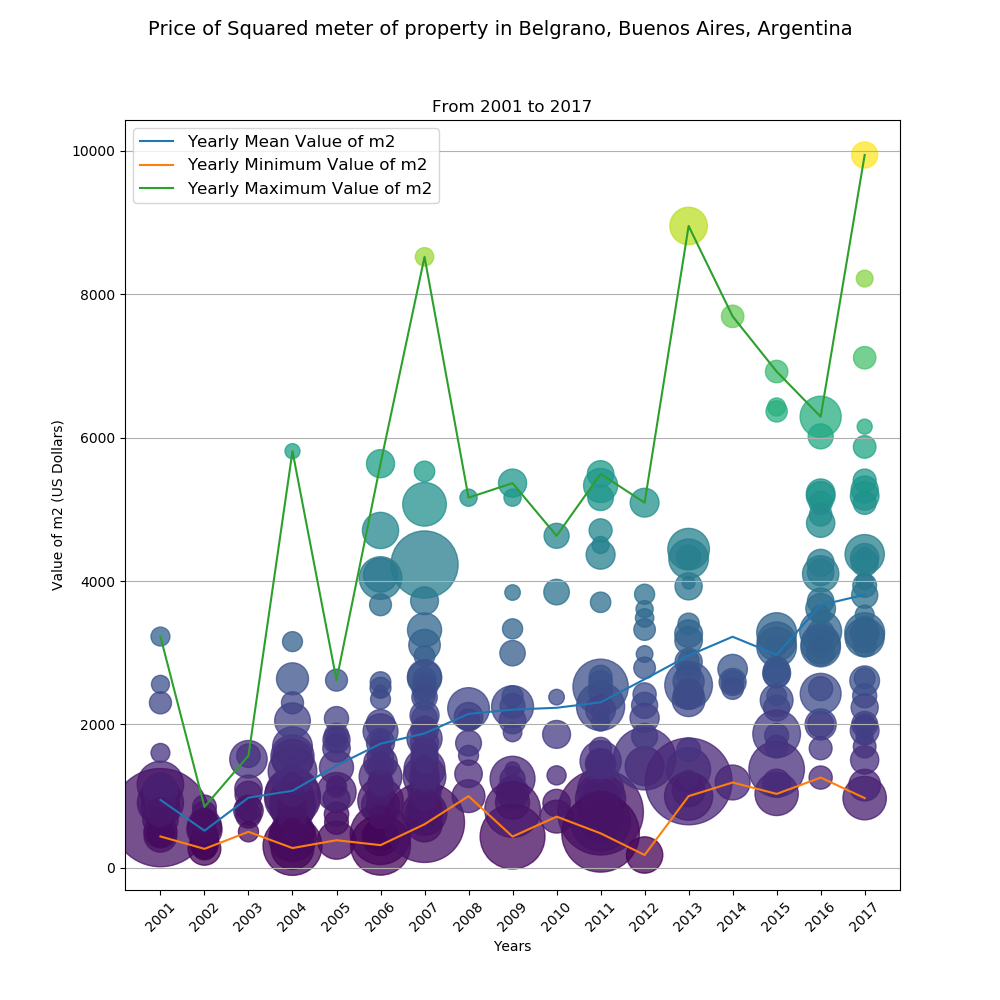

In [63]:
plt.figure()

plt.suptitle("Price of Squared meter of property in Belgrano, Buenos Aires, Argentina", fontsize=14)
plt.title("From 2001 to 2017", fontsize=12)

plt.scatter(belgrano.index, belgrano['Value of m2 (US Dollars)'], c=belgrano['Value of m2 (US Dollars)'], s=belgrano['m2'], 
            alpha=0.75)
plt.plot(belgrano.index, belgrano['Yearly Mean value of m2'], ms=2)
plt.plot(belgrano.index, belgrano['Yearly Min value of m2'], ms=2)
plt.plot(belgrano.index, belgrano['Yearly Max value of m2'], ms=2)

ax = plt.gca()
ax.yaxis.grid()

plt.legend(['Yearly Mean Value of m2', 'Yearly Minimum Value of m2', 'Yearly Maximum Value of m2'], loc='upper left',
           prop={'size':12})

plt.xlabel('Years')
plt.ylabel('Value of m2 (US Dollars)')

# remove the frame of the chart
#for spine in plt.gca().spines.values():
#    spine.set_visible(False)
    
x = plt.gca().xaxis

for item in x.get_ticklabels():
    item.set_rotation(45)
    
plt.savefig(fname = "Belgrano.png", bbox_inches='tight')

In [58]:
belgrano.dtypes

Value in US Dollars         float64
Value of m2 (US Dollars)    float64
m2                          float64
Yearly Mean value of m2     float64
Yearly Min value of m2      float64
Yearly Max value of m2      float64
Yearly std for m2 value     float64
dtype: object